# Classification

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import scipy.optimize as opt
import itertools
from sklearn import preprocessing
from sklearn.metrics import jaccard_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load data

In [98]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [108]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [109]:
X = np.asanyarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']])
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [110]:
y = np.asanyarray(df[['output']])
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [111]:
print (X[0:5])
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
print (X[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51]]


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ("Train set:", X_train.shape, y_train.shape)
print ("Test set:", X_test.shape, y_test.shape)

Train set: (242, 13) (242, 1)
Test set: (61, 13) (61, 1)


In [113]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [114]:
yhat = LR.predict(X_test)
print (yhat)
print (y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]]


In [127]:
print ("Jaccard_score:%.2f" % jaccard_score(y_test, yhat, pos_label=1))
print ("Log_loss: :%.2f" % log_loss(y_test, yhat_prob))
print ("F1_score: %.2f" %  f1_score(y_test, yhat, average="weighted"))

Jaccard_score:0.82
Log_loss: :0.44
F1_score: 0.88


In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

Confusion matrix, without normalization
[[21  4]
 [ 3 33]]


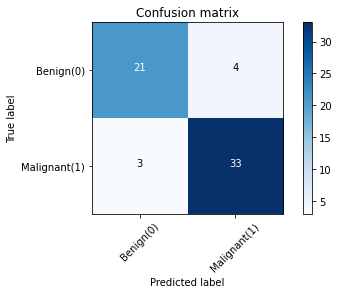

In [129]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0, 1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)', 'Malignant(1)'], normalize=False, title='Confusion matrix')
